# CASE STUDY-  REGRESSION

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso

Reading the csv file of data set 'car_age_price' into python envrionment

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\car_age_price.csv")

Displaying the top 5 rows of data

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


The dataset contains 2 columns..Year of making and Price

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.columns

Index(['Year', 'Price'], dtype='object')

# FIND THE CORRELATION BETWEEN YEAR AND PRICE

Find the correlation coeffiecent and plot it using heatmap

<AxesSubplot:>

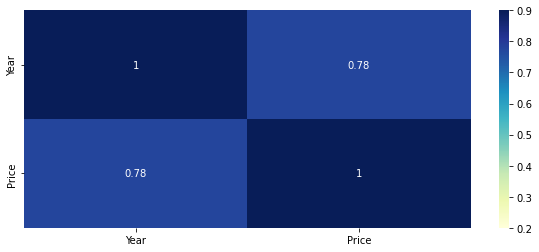

In [6]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='YlGnBu')

Splitting the data and target

In [7]:
X=data.drop(['Price'],axis=1)
y=data['Price']

In [8]:
print(X)

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns]


In [9]:
print(y)

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


## Splitting Data into Training data and test data

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

## Linear Regression Model

In [11]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [12]:
print("Mean Squared Error is : ", mean_squared_error(y_test,predictions))
print(" R squared value is   : ",r2_score(y_test,predictions))

Mean Squared Error is :  4326906256.829671
 R squared value is   :  0.36759313425902185


Predicting for the year 2022

In [13]:
year = [2022]
year = pd.DataFrame(year, columns=['Year'])
predictions = model.predict(year)
predictions

array([743601.61594504])

## POSSIBLE PRICE OF 2022 MODEL SECOND HAND GRAND I10 IS 743601..

# LASSO REGRESSION MODEL

In [14]:
lasso=Lasso(alpha=1.0)
lasso.fit(X_train,y_train)

Lasso()

In [15]:
y_pred1=lasso.predict(X_test)

In [16]:
y_pred1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [17]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


MEAN SQUARED ERROR AND LASSO REGRESSION MODEL

In [18]:
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 4326859771.015669


In [19]:
print('R Squared value is:',r2_score(y_test,y_pred1))

R Squared value is: 0.3675999284778446


In [20]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

In [21]:
##Predicting price of i10 in the year using Lasso Regression model
##Price in year 2022 would be: 743599.37427144
year = [2022]
year = pd.DataFrame(year, columns=['Year'])
prediction = lasso.predict(year)
prediction

array([743599.37427144])

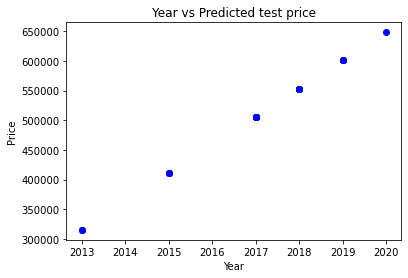

In [22]:
plt.scatter( X_test, y_pred1 ,color='blue')
          
plt.title( 'Year vs Predicted test price' )
      
plt.xlabel( 'Year' )
plt.ylabel( 'Price' )
      
plt.show()

Mean Squared Error using Linear Regression  -   4326906256.829671
Mean squared Error using LASSO regression   -   4326859771.015669
